# What is the UK inflation rate and why is the cost of living rising?

## Table of Contents


### 1. UK inflation rate and cost of living

        1.1 What does inflation mean?
        1.2 Why are prices rising so fast?
        1.3 Are wages keeping up with inflation?
        1.4 How is the UK's inflation rate measured?
        1.5 What's happening in other countries?
        1.6 When will inflation come down?
        1.7 What can be done to tackle inflation?
        
### 2. Aim

### 3. Webscrapping and Data Visualisation

        3.1 Installing and importing the libraries
        3.2 Scrapping the BBC website
        3.3 Python BeautifulSoup Parsing HTML
        3.4 Read the dataset using pandas
        3.5 Data Analysis
        3.6 Data Preparation
        3.7 Time series decomposition
        3.8 Splitting of the training and test sets 
        
### 4. Building ARIMA Model
        
        4.1 Box-Cox Transformation
        4.2 Differencing
        4.3 Order of ARIMA
        4.4 ARIMA model
        
        
### 5. Conclusion
        
### 6. References
        
        


## 1. UK inflation rate and cost of living

   Inflation is an alarming topic as it impacts the general public. Firstly, we should know a little bit about inflation and how its impacting prices, wages etc. Secondly, we should know how it is measured. Lastly, a possible solution to tackle inflation.
   
   The below content is taken from BBC News , please refer to the link [1] provided in the  resource section.

### 1.1	What does inflation mean?
     
Inflation is the increase in the price of something over time.

For example, if a bottle of milk costs £1 and it goes up to £1.05 a year later, then milk inflation is 5%. 




### 1.2 Why are prices rising so fast?

The cost of energy is a key reason why things are getting more expensive.

Oil and gas prices increased because they were in greater demand as life got back to normal after Covid. At the same time, the war in Ukraine meant less was available from Russia, putting further pressure on prices.

The war in Ukraine also led to food prices going up, by reducing the amount of grain available.

The price of food and non-alcoholic drinks rose by 14.6% in the year to September, reaching its highest level since April 1980.

Separate research focusing on 30 everyday supermarket items reveals dramatic increases in the price of pasta (60%), tea (46%) and vegetable oil (65%) in the 12 months to September.
Only a few items fell in price, including orange juice (-8.9%) and beef mince (-7.4%).



### 1.3	Are wages keeping up with inflation?

Pay increases for many people aren't keeping up with rising prices.

This means people's money doesn't go as far, so buying things and paying bills gets harder.
Average wages, not including bonuses, rose by 5.4% in the three months to August 2022.

Wages for people working in the private sector increased by 6.2%, compared with 2.2% for those in public sector jobs.

Overall, once inflation is taken into account, average pay actually fell by 2.9%.

Unions say wages should reflect the cost of living. However, the government says this could push inflation even higher because companies could increase prices to cover higher wages.



### 1.4	How is the UK's inflation rate measured?

To come up with an inflation figure, the Office for National Statistics keeps track of the prices of hundreds of everyday items. This is known as the "basket of goods". 

The basket is constantly updated. Tinned beans and sports bras were added this year, reflecting interest in plant-based diets and exercise.

Each month's inflation figure shows how much these prices have risen since the same date last year. This is known as the Consumer Prices Index (CPI).


### 1.5	What’s happening in other countries?

Other countries are also experiencing a cost of living squeeze.

Many of the reasons are the same - increased energy costs, shortages of goods and materials and the fallout from Covid.

September's annual inflation rate for countries which use the euro is forecast to be 10% in September, mainly because of energy costs.

In the US, prices rose 8.2% in the 12 months to September.


### 1.6	When will inflation come down?

Lower inflation does not mean prices will go down. It just means they will stop rising as fast.
The Bank of England says it expects inflation to "peak at 11% and then remain above 10% for a few months before starting to come down". It says inflation will be near the official target of 2% in "around two years".

But with uncertainty over what will happen to energy prices and the impact of recent policy changes by the government, it is hard to predict what will happen.



### 1.7	What can be done to tackle inflation?

The Bank of England's traditional response to rising inflation is to raise interest rates. This can encourage people to save, but means some people with mortgages see their monthly payments go up.

Raising interest rates also makes borrowing more expensive and - it is hoped - people have less money to spend. As a result, they will buy fewer things and prices will stop rising as fast.
But when inflation is caused by things like rising energy prices worldwide, there is a limit as to how effective UK interest rate rises can be in slowing inflation.

After increasing rates to their highest level in 14 years in September, the Bank said it would "not hesitate" to go further in order to tackle inflation. The next interest rate decision is on 3 November.



## 2. Aim

To predict the CPI (Consumer Price Index) for United Kingdom.

## 3. Webscrapping and Data Visualisation

The information provided by BBC News helped us to understand how inflation is impacting the cost of living. Let's find more about inflation through the dataset downloaded from Kaggle, please refer to link [2] provided in the resource section.

### 3.1 Importing the libraries


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import boxcox

### 3.2 Scrapping the BBC website 
The content is taken from BBC page. Request the URL using requests.get(url) and print it's content.

In [2]:
url = "https://www.bbc.co.uk/news/business-12196322"
r  = requests.get(url) # Making a GET request
print(r.content) # print content of request

b'<!DOCTYPE html><html lang="en-GB" class="no-js"><head><meta charSet="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1" /><title data-rh="true">What is the UK inflation rate and why is the cost of living rising? - BBC News</title><meta data-rh="true" name="description" content="The cost of living is increasing at its fastest rate in 40 years, due to rising food and energy prices."/><meta data-rh="true" name="theme-color" content="#FFFFFF"/><meta data-rh="true" property="article:author" content="https://www.facebook.com/bbcnews"/><meta data-rh="true" property="fb:admins" content="100004154058350"/><meta data-rh="true" property="fb:app_id" content="1609039196070050"/><meta data-rh="true" property="fb:pages" content="1143803202301544,317278538359186,1392506827668140,742734325867560,185246968166196,156060587793370,137920769558355,193435954068976,21263239760,156400551056385,929399697073756,154344434967,228735667216,80758950658,260212261199,294662213128,1086451581

### 3.3 Parsing the HTML

In [3]:
soup = BeautifulSoup(r.content, 'html.parser') # Parsing the HTML
print(soup.prettify()) 

<!DOCTYPE html>
<html class="no-js" lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title data-rh="true">
   What is the UK inflation rate and why is the cost of living rising? - BBC News
  </title>
  <meta content="The cost of living is increasing at its fastest rate in 40 years, due to rising food and energy prices." data-rh="true" name="description"/>
  <meta content="#FFFFFF" data-rh="true" name="theme-color"/>
  <meta content="https://www.facebook.com/bbcnews" data-rh="true" property="article:author"/>
  <meta content="100004154058350" data-rh="true" property="fb:admins"/>
  <meta content="1609039196070050" data-rh="true" property="fb:app_id"/>
  <meta content="1143803202301544,317278538359186,1392506827668140,742734325867560,185246968166196,156060587793370,137920769558355,193435954068976,21263239760,156400551056385,929399697073756,154344434967,228735667216,80758950658,260212261199,294662213128,108645158143

#### Let's find the title tag and its text

In [4]:
print(soup.title)

<title data-rh="true">What is the UK inflation rate and why is the cost of living rising? - BBC News</title>


In [5]:
print(soup.title.text) 

What is the UK inflation rate and why is the cost of living rising? - BBC News


### 3.4 Read the dataset using pandas

Downloaded the dataset in csv format from Kaggle, please refer the link [3] provided in the  resource section.

In [6]:
data = pd.read_csv("E:\Data Programming\World Development Indicators1.csv")
data.head(5)

,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.288859,NaN,NaN
1,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.102374,NaN,NaN
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.654867,NaN,NaN,1.246285,NaN,NaN
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.689655,NaN,NaN,1.337970,NaN,NaN
4,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.308219,NaN,NaN,2.534973,NaN,NaN


In [7]:
data.shape

(62, 267)

In [8]:
UK = data[['Year', 'United Kingdom']] # Let's look for UK data 
UK.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            62 non-null     int64  
 1   United Kingdom  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


Findings:
    
There are no missing value because we have 62 entries and 62 non-null count for both the column ('Year', 'United Kingdom').

### 3.5 Data Analysis

In [9]:
UK.isnull().sum() # check for missing value

Year              0
United Kingdom    0
dtype: int64

In [10]:
UK.describe() # let's find out the outliers  
# minimum value is outlier here

,Year,United Kingdom
count,62.000000,62.000000
mean,1990.500000,5.048702
std,18.041619,4.829198
min,1960.000000,0.368047
25%,1975.250000,2.117138
50%,1990.500000,3.354598
75%,2005.750000,5.993608
max,2021.000000,24.207288


Findings:

Describe function help us to analyse, if we have any outlier in the given data.
The minimum value from the above table indicate that we do have outliers in this data.

#### Boxplot the UK data to check for outlier

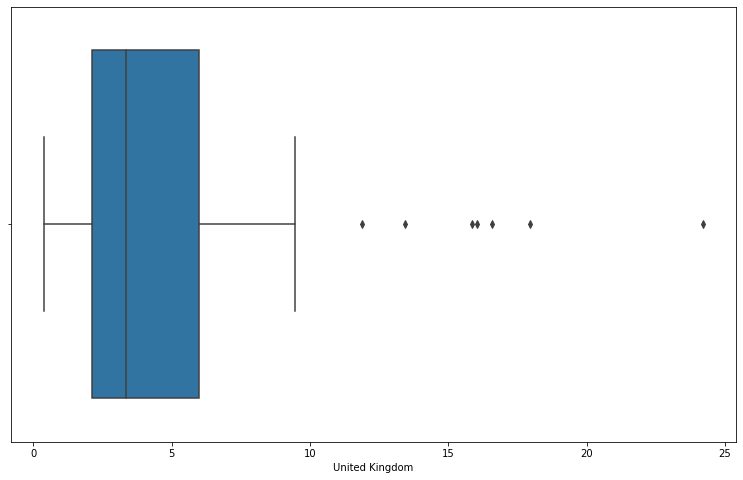

In [38]:
plt.figure(figsize=(13,8))
sns.boxplot(data['United Kingdom']) 
plt.show()

import warnings 
warnings.filterwarnings('ignore')

Findings:

boxplot() function create box plots which help us to find the outliers.
As shown on the graph above, values more than 10 are under the category of outliers.
The question here is what we need to do with the outliers.
Outliers will impact the trend, hence we need to work on it and minimize its impact.
Let's see in next steps how we can do this.

### 3.6 Data Preparation

In [12]:
UK[UK['United Kingdom']>10]

,Year,United Kingdom
14,1974,16.044011
15,1975,24.207288
16,1976,16.559523
17,1977,15.840267
19,1979,13.421280
20,1980,17.965924
21,1981,11.876627


Findings:

We can see from the above table that we have 7 outliers. 

In [13]:
UK.loc[13:22]

,Year,United Kingdom
13,1973,9.196033
14,1974,16.044011
15,1975,24.207288
16,1976,16.559523
17,1977,15.840267
18,1978,8.263141
19,1979,13.421280
20,1980,17.965924
21,1981,11.876627
22,1982,8.598864


Findings:

After adding Index 13 and Index 22, we can see that the outlier's value is high.

In [14]:
UK.loc[14,'United Kingdom'] = (data.loc[13,'United Kingdom']+data.loc[22,'United Kingdom'])/2
UK.loc[15,'United Kingdom'] = (data.loc[13,'United Kingdom']+data.loc[22,'United Kingdom'])/2
UK.loc[16,'United Kingdom'] = (data.loc[13,'United Kingdom']+data.loc[22,'United Kingdom'])/2
UK.loc[17,'United Kingdom'] = (data.loc[13,'United Kingdom']+data.loc[22,'United Kingdom'])/2
UK.loc[18,'United Kingdom'] = (data.loc[13,'United Kingdom']+data.loc[22,'United Kingdom'])/2
UK.loc[19,'United Kingdom'] = (data.loc[13,'United Kingdom']+data.loc[22,'United Kingdom'])/2
UK.loc[20,'United Kingdom'] = (data.loc[13,'United Kingdom']+data.loc[22,'United Kingdom'])/2
UK.loc[21,'United Kingdom'] = (data.loc[13,'United Kingdom']+data.loc[22,'United Kingdom'])/2

Finding:
    
Let's assign the avarege value of Index 13 and Index 22 for the Index 14 till Index 21 as shown above.
This will help us to minimise the impact of outliers on the trend.

In [15]:
UK.loc[13:22]

,Year,United Kingdom
13,1973,9.196033
14,1974,8.897448
15,1975,8.897448
16,1976,8.897448
17,1977,8.897448
18,1978,8.897448
19,1979,8.897448
20,1980,8.897448
21,1981,8.897448
22,1982,8.598864


Findings:

As per the table above, we can see that values are fixed from Index 14 to Index 22.

### 3.7 Time series decomposition

This is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise. Please refer to link [3] provided in the resource section.

In [16]:
data_tsd = pd.DataFrame(UK) # coverting dataset to dataframe

In [17]:
data_tsd = data_tsd.set_index("Year") # replacing Index with Year

In [18]:
data_tsd

,United Kingdom
Year,
1960,1.003576
1961,3.447496
1962,4.196499
1963,2.018544
1964,3.281587
...,...
2017,2.557756
2018,2.292840
2019,1.738105


Finding:

We have replaced the Index with Year, this help us to plot the graph effectively. 

In [19]:
data_tsd.index.dtype

dtype('int64')

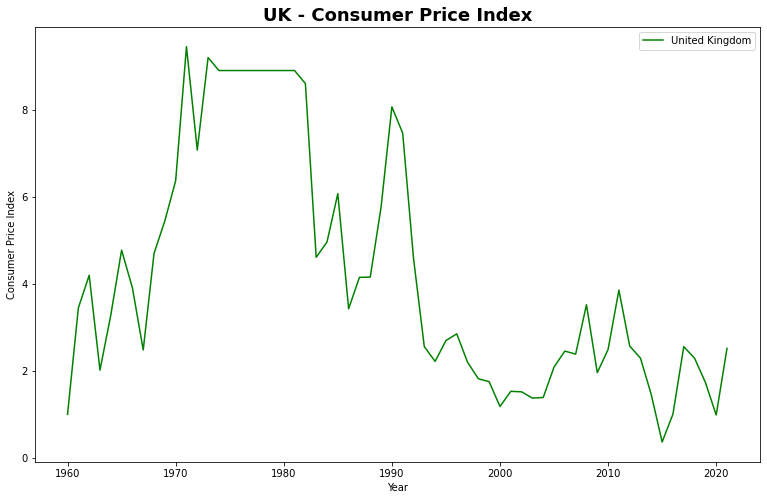

In [20]:
plt.figure(figsize=(13,8))
plt.plot(data_tsd, color='green', label='United Kingdom')
plt.title('UK - Consumer Price Index', fontsize=18, weight='bold')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index')
plt.legend(loc='upper right')
plt.show()

Finding:

As per the above graph, we can analyse the trend of UK inflation. 

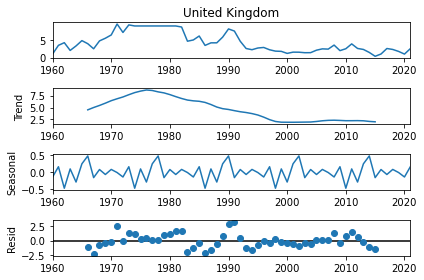

In [21]:
decomposition = sm.tsa.seasonal_decompose(data_tsd['United Kingdom'], model = 'additive', period = 12)
decomposition.plot()
plt.show()

Findings:

- We can see the residual graph show most of the values close to zero which means that the decomposition performed correctly.
- The seasonal data follow additive model.
- Below information is capture from the link [3] provided in the  resource section.
    - Seasonality: describes the periodic signal in your time series.
    - Trend: describes whether the time series is decreasing, constant, or increasing over time.
    - Noise: describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.


### 3.8 Splitting of the training and test sets 
    
- We need to split the data into training and testing dataset.
- Please note that the training dataset should be more than 50% of the data.
- Training dataset help us to build model to predict the forecast which we will run on test dataset.

In [22]:
Training_len = 45
Training = data_tsd[ 0 : Training_len]
Testing = data_tsd[Training_len : ]

In [23]:
Training

,United Kingdom
Year,
1960,1.003576
1961,3.447496
1962,4.196499
1963,2.018544
1964,3.281587
1965,4.773775
1966,3.909618
1967,2.482116
1968,4.697428


In [24]:
Testing

,United Kingdom
Year,
2005,2.089136
2006,2.455662
2007,2.386562
2008,3.521409
2009,1.961732
2010,2.492655
2011,3.856112
2012,2.573235
2013,2.291667


## 4. Building ARIMA Model

In [25]:
data_bc = pd.Series(boxcox(data_tsd['United Kingdom'], lmbda = 0), index = data_tsd.index) 

### 4.1 Box-Cox Transformation

- A box-cox transformation is a commonly used method for transforming a non-normally distributed dataset into a more normally distributed one. 
- The basic idea behind this method is to find some value for λ such that the transformed data is as close to normally distributed as possible, using the following formula:
    - y(λ) = (yλ – 1) / λ  if y ≠ 0
    - y(λ) = log(y)  if y = 0
- Above information is captured from the link [4] provided in the resource section.

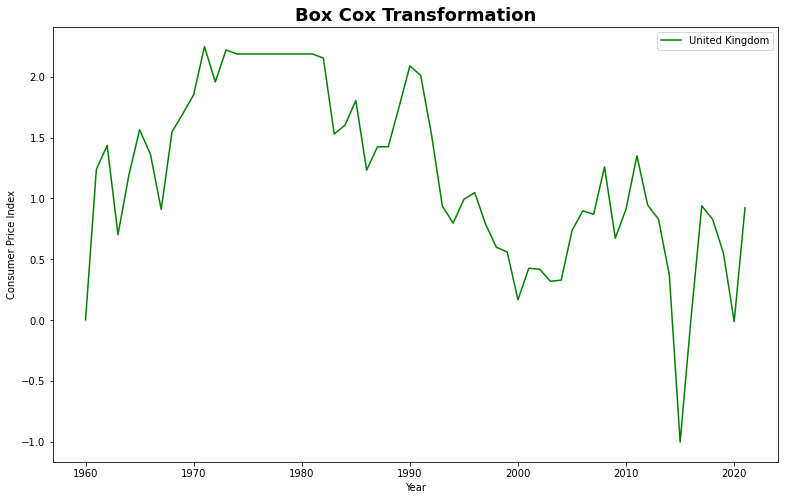

In [26]:
plt.figure(figsize=(13,8))
plt.plot(data_bc, color='green', label='United Kingdom')
plt.title('Box Cox Transformation', fontsize=18, weight='bold')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index')
plt.legend(loc='upper right')
plt.show()

In [27]:
data_bc

Year
1960    0.003569
1961    1.237648
1962    1.434251
1963    0.702376
1964    1.188327
          ...   
2017    0.939130
2018    0.829791
2019    0.552795
2020   -0.010569
2021    0.923612
Length: 62, dtype: float64

### 4.2 Differencing

- Differencing is one of the possible methods of dealing with non-stationary data and it is used for trying to make such a series stationary. In practice, it means subtracting subsequent observations from one another, following the formula:
    - diff(t) = x(t) — x(t — 1)
     - where diff is the differenced series at time t and x stands for an observation of the original series. 
     
- Above information is captured from the link [5] provided in the resource.

In [28]:
data_bc_diff = pd.Series(data_bc - data_bc.shift(), data_tsd.index) 

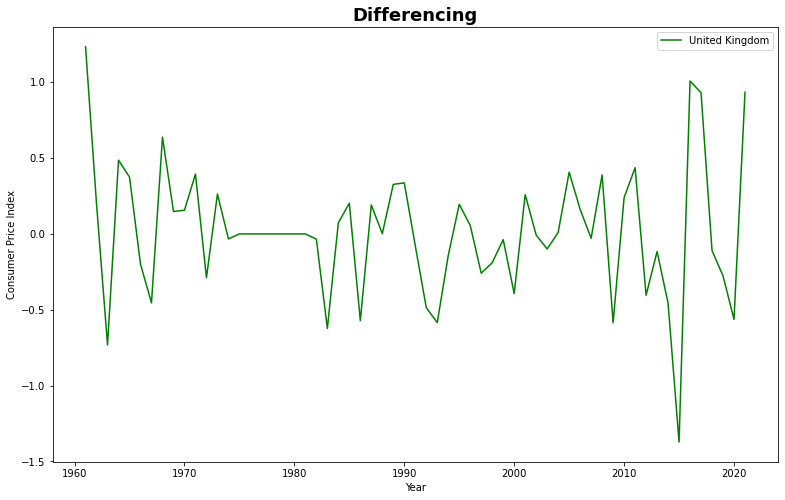

In [29]:
plt.figure(figsize=(13,8))
plt.plot(data_bc_diff, color='green', label='United Kingdom')
plt.title('Differencing', fontsize=18, weight='bold')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index')
plt.legend(loc='upper right')
plt.show()

Finding:

- The graph above shows that most of the values are near to zero which means it follow stationary series.

In [30]:
data_bc_diff

Year
1960         NaN
1961    1.234079
1962    0.196602
1963   -0.731874
1964    0.485951
          ...   
2017    0.930748
2018   -0.109339
2019   -0.276996
2020   -0.563364
2021    0.934181
Length: 62, dtype: float64

In [31]:
data_bc_diff.dropna(inplace=True) # Dropping the first value, when we use differencing then the first value will be Null.

In [32]:
data_bc_diff

Year
1961    1.234079
1962    0.196602
1963   -0.731874
1964    0.485951
1965    0.374810
          ...   
2017    0.930748
2018   -0.109339
2019   -0.276996
2020   -0.563364
2021    0.934181
Length: 61, dtype: float64

### 4.3 Order of ARIMA

- Our dataset is seasonal as per time series decomposition, hence the parameters are:
    - P: The number of seasonal lag observations the model will use
    - D: The number of times that the seasonal observations are differenced till stationarity.
    - Q: The size of the seasonal moving average window.
    - m: The number of observations of 1 season
    
 - Above information is captured from the link [6] provided in the resource section.



In [33]:
from pmdarima import auto_arima

best_fit = auto_arima(data['United Kingdom'], trace = True, suppress_warnings = True)
best_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=294.507, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=296.494, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=298.494, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=298.494, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=294.499, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.221 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -146.250
Date:                Mon, 07 Nov 2022   AIC                            294.499
Time:                        13:23:50   BIC                            296.610
Sample:                             0   HQIC                           295.327
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.0794      0.859      8.241      0.000       5.396       8.763
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.48
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 4.4 ARIMA model

- ARIMA is one of the most popular statistical models. It stands for AutoRegressive Integrated Moving Average and it’s fitted to time series data either for forecasting or to better understand the data.
- The key aspects of the ARIMA model are the following:
    - AR: Autoregression. This indicates that the time series is regressed on its own lagged values.
    - I: Integrated. This indicates that the data values have been replaced with the difference between their values and the  previous values in order to convert the series into stationary.
    - MA: Moving Average. This indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.
- Above information is captured from the link [6] provided in the resource section.
 

In [34]:
# Fit ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
amodel = ARIMA(data_bc_diff, order = (0,1,0))
amodel_fit = amodel.fit()

import warnings 
warnings.filterwarnings('ignore')

In [35]:
print(amodel_fit.params)
amodel_fit.summary()

sigma2    0.379052
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -56.034
Date:                Mon, 07 Nov 2022   AIC                            114.068
Time:                        13:23:50   BIC                            116.162
Sample:                             0   HQIC                           114.887
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3791      0.046      8.313      0.000       0.290       0.468
===================================================================================
Ljung-Box (L1) (Q):                   5.61   Jarque-Bera (JB):                29.59
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                             1.10
Prob(H) (two-sided):                  0.10   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# recover original time series
a = data_bc_diff.copy()
a['f_bc_diff'] = amodel_fit.predict(data_bc_diff.index.min(),data_bc_diff.index.max())
a['f_bc'] = a['f_bc_diff'].cumsum()
a['f_bc'] = a['f_bc'].sub(data_bc[1960])
a['f'] = np.exp(a['f_bc'])
a['f']

1961    2.536061e+00
1962    6.454601e+00
1963    1.642779e+01
1964    4.181084e+01
1965    1.064140e+02
            ...     
2017    1.330168e+23
2018    3.385448e+23
2019    8.616401e+23
2020    2.192985e+24
2021    5.581429e+24
Name: predicted_mean, Length: 61, dtype: float64

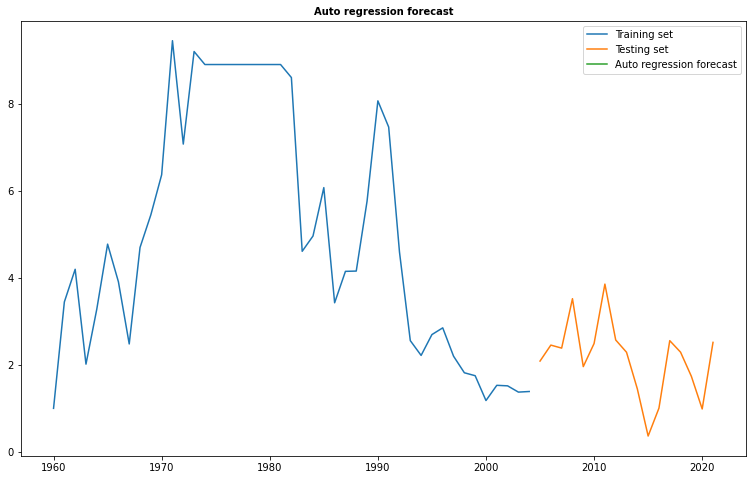

In [37]:
plt.figure(figsize=(13,8))
plt.plot(Training['United Kingdom'], label = 'Training set')
plt.plot(Testing['United Kingdom'], label = 'Testing set')
plt.plot(a['f'][Testing.index.max():] , label = 'Auto regression forecast')
plt.legend(loc='upper right')
plt.title('Auto regression forecast', fontsize=10, weight='bold')
plt.show()

## 5. Conclusion

 The given dataset falls under the category of time series data. As per my observation, the cost of living will increase because of inflation. Prices will not be reduced if the inflation decrease. This only imply that the prices are not rising as before. Projection as of November 2022 by the Bank of England shows that the inflation will drop sharply [ref 1]. This is just the prediction but it still depends on many factors like cost of energy, etc.
 
  ##### Summary
 - The "World development indicator;" dataset contain inflation of UK from the year 1960 to 2021. We have checked for null values and the outliers in the given dataset. We did not find any null value but we found 7 outliers. We have fixed those outliers so that it will not impact the trend. 
 - We have used time series decomposition to check for the underlying pattern such as trend, seasonality, and noise also known as residual. The model used is additive based on seasonal data.
 - Training and testing dataset is created so that we build a model on training dataset and run it on the test dataset.
 - To build ARIMA model, we have used Boxcox transformation and differencing to achieve the stationarity. We have also found the order of ARIMA as (0,1,0) using auto_arima function. 
 - Finally, we have created the ARIMA model using the training dataset and tried to plot the prediction on dataset. However, I am unable to find the prediction/forecast for this dataset. 
 - I am currently studying more about ARIMA model and will cover this in future. 



## 6. References

    - [1] https://www.bbc.co.uk/news/business-12196322
    - [2] https://www.kaggle.com/datasets/bhupeshsinghrathore/world-inflation-dataset-19602021
    - [3] https://towardsdatascience.com/time-series-decomposition-in-python-8acac385a5b2
    - [4] https://www.statology.org/box-cox-transformation-python/
    - [5] https://towardsdatascience.com/an-intuitive-guide-to-differencing-time-series-in-python-1d6c7a2c067a#:~:text=The%20easiest%20way%20to%20apply%20differencing%20in%20Python,differenced%20series%20as%20described%20in%20the%20formula%20above.
    - [6] https://towardsdatascience.com/arima-model-in-python-7bfc7fb792f9
   